# NCR School Re-opening

- Simulation Start Date: August 1, 2021 
- Validation Data: August 2, 2021 - November 10, 2021 (100 days)
- Steps: 100
- Iterations: 20 

## 1. SEIRDV Data and Parameter Values

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

### 1.1 Population of NCR

NCR 2015 Population
- Source: https://www.philatlas.com/luzon/ncr.html
- Accessed: December 2, 2021

In [2]:
ncr_pop_2015 = [
    1199854, # 0 - 4
    1163108, # 5 - 9
    1134446, # 10 - 14
    1244186, # 15 - 19
    1335898, # 20 - 24
    1254938, # 25 - 29
    1088095, # 30 - 34
    955532,  # 35 - 39
    803784,  # 40 - 44
    707138,  # 45 - 49
    587738,  # 50 - 54
    466194,  # 55 - 59
    343615,  # 60 - 64
    222234,  # 65 - 69
    122310,  # 70 - 74
    83223,   # 75 - 79
    75376,   # 80 years and over
]

# Population Distribution in 2015
ncr_pop_2015_dist = np.divide(ncr_pop_2015, sum(ncr_pop_2015))

We use the population distribution of NCR in 2015 to estimate the distribution in 2020. 

NCR 2020 Population 
- Source: https://psa.gov.ph/content/highlights-national-capital-region-ncr-population-2020-census-population-and-housing-2020
- Accessed: December 2, 2021

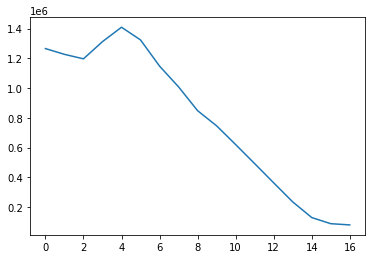

In [3]:
ncr_pop_2020 = 13484462
ncr_pop_2020 = ncr_pop_2020 * ncr_pop_2015_dist
plt.plot(ncr_pop_2020)

### 1.2 DOH Data: Active, Dead, Recovered 

The COVID-19 data from the DOH Data Drop is divided into three batches, i.e., 0, 1, and 2. We will combine the number of active, dead, and recovered individuals from 2020 to August 1, 2021.

In [4]:
import utils.covid_data_extractor as covid_extractor

region = "NCR"
batches = 3
age_groups = 17
active = np.zeros(age_groups)
deaths = np.zeros(age_groups)
recoveries = np.zeros(age_groups)

for i in range(batches):
    # Opens the file and instantiates the extractor
    filename = "input/covid_data/DOH COVID Data Drop_ 20211209 - 04 Case Information_batch_%i.csv" % (i)
    extractor = covid_extractor.DOHCovid19DataExtractor(filename)
    
    # Sets start and end dates to filter records that are gathered within the dates (inclusive)
    start = {"m": 1, "d": 1, "y": 2020}
    end = {"m": 9, "d": 15, "y": 2021}
    extractor.cut_data(start, end, 'DateResultRelease')
    
    # Extracts the cases in the region
    cases = extractor.count_cases_region(region)
    active = active + cases["I"]
    deaths = deaths + cases["D"]
    recoveries = recoveries + cases["R"]
    
pd.DataFrame([active, deaths, recoveries], index=["active", "dead", "recovered"]).transpose()

C:\Users\Thomas\AppData\Local\Temp/ipykernel_10852/3805561035.py:13: DtypeWarning: Columns (15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  extractor = covid_extractor.DOHCovid19DataExtractor(filename)
C:\Users\Thomas\Documents\Thesis\covid-19-model\utils\covid_data_extractor.py:36: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  age_group_data = data[data["Age"].between(min_age, max_age, inclusive=True)]
C:\Users\Thomas\Documents\Thesis\covid-19-model\utils\covid_data_extractor.py:36: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  age_group_data = data[data["Age"].between(min_age, max_age, inclusive=True)]
C:\Users\Thomas\Documents\Thesis\covid-19-model\utils\covid_data_extractor.py:36: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  age_group_data = data[data["Age"].betwee

,active,dead,recovered
0,16.0,62.0,12576.0
1,12.0,11.0,14702.0
2,10.0,23.0,18955.0
3,10.0,41.0,26302.0
4,37.0,78.0,60040.0
5,55.0,157.0,79819.0
6,59.0,190.0,67599.0
7,65.0,267.0,51675.0
8,65.0,385.0,43842.0
9,73.0,463.0,35980.0


### 1.3 Vaccinated as of August 2, 2021

We estimate the number of vaccinated individuals in NCR as of August 2, 2021 (v_ncr_then).
- 1) We get the latest NCR - PH vaccination ratio (v_ratio_now = v_ncr_now / v_ph_now). 
- 2) We estimate the number of vaccinated individuals in NCR as of Aug 2, 2021 (v_ncr_then = v_ratio_then * v_ph_then)

Data Sources:

v_ncr_now
- Fully Vaccinated in NCR as of November 16, 2021. 
- Source: https://news.abs-cbn.com/spotlight/multimedia/infographic/03/23/21/philippines-covid-19-vaccine-tracker. 
- Accessed: December 2, 2021

v_ph_now
- Fully Vaccinated in PH as of November 18, 2021
- Source: https://ourworldindata.org/covid-vaccinations?country=PHL
- Accessed: December 2, 2021

v_ph_then
- Fully vaccinated in PH as of August 2, 2021
- Source: https://ourworldindata.org/covid-vaccinations?country=PHL
- Accessed: December 2, 2021

In [5]:
# Step 1
v_ph_now = 32993083
v_ncr_now = 10080579
v_ratio_now = v_ncr_now / v_ph_now

# Step 2
v_ph_then = 9115163
v_ncr_then = v_ratio_now * v_ph_then

v_ncr_ratio = v_ncr_then / sum(ncr_pop_2020) 
vaccinated = v_ncr_then
v_ncr_ratio= 0
vaccinated= 0
v_ncr_ratio, vaccinated

(0, 0)

### 1.4 Vaccine Efficacy Estimate

We estimate the average efficacy by getting the weighted average of efficacy (lower bound) of the vaccines and the supply available in the Philippines.

Data:
- Supply in PH as of Oct 10, 2021

In [6]:
# sinovac = 41500000
# astrazeneca = 11103340
# pfizer = 23328630
# sputnik_v = 1290000
# johnson_and_johnson = 3240850
# moderna = 9985800
# sinopharm = 1100000
# supply = [sinovac, astrazeneca, pfizer, sputnik_v, johnson_and_johnson, moderna, sinopharm]
# efficacy = [0.650, 0.704, 0.950, 0.916, 0.669, 0.941, 0.790] # lower bound

# # Weighted Average
# expected_efficacy = sum(np.multiply(supply, efficacy)) / sum(supply) 
expected_efficacy = 0.770840197

### 1.6 SEIRDV

- n = NCR's 2020 Population
- e = exposed = 0 (assumption) 
- i = infectious = active 
- r = recovered
- d = dead 
- v = vaccinated
- s = n - (e + i + r + d + v)

In [7]:
n = ncr_pop_2020
e = 0 # assumption 
i = active 
r = recoveries 
d = deaths
s = n - (e + i + r + d)

Vaccination Scenarios: 20%, 25%, 50%, 75%, 100%

In [9]:
# Eligible population: Ages 16 and above only 
eligible = np.concatenate(([0, 0, 0], s[3:]))

# Vaccinated Individuals
v_control = eligible * expected_efficacy * v_ncr_ratio
v_25 = eligible * expected_efficacy * 0.25
v_50 = eligible * expected_efficacy * 0.5
v_75 = eligible * expected_efficacy * 0.75
v_100 =  eligible * expected_efficacy * 1
v_scenarios = [v_control, v_25, v_50, v_75, v_100]


# SEIRDV Data for each scenario
seirdv_control = {}
seirdv_25 = {}
seirdv_50 = {}
seirdv_75 = {}
seirdv_100 = {}
seirdv_data = [seirdv_control, seirdv_25, seirdv_50, seirdv_75, seirdv_100]

for j, seirdv in enumerate(seirdv_data):
    seirdv["S"] = s - v_scenarios[j]
    seirdv["E"] = e
    seirdv["I"] = i
    seirdv["R"] = r
    seirdv["D"] = d
    seirdv["V"] = v_scenarios[j]

print("Control Scenario")
pd.DataFrame(seirdv_control)

Control Scenario


,S,E,I,R,D,V
0,1.252579e+06,0,16.0,12576.0,62.0,0.0
1,1.211760e+06,0,12.0,14702.0,11.0,0.0
2,1.177273e+06,0,10.0,18955.0,23.0,0.0
3,1.285628e+06,0,10.0,26302.0,41.0,0.0
4,1.348535e+06,0,37.0,60040.0,78.0,0.0
5,1.243288e+06,0,55.0,79819.0,157.0,0.0
6,1.079537e+06,0,59.0,67599.0,190.0,0.0
7,9.555914e+05,0,65.0,51675.0,267.0,0.0
8,8.032897e+05,0,65.0,43842.0,385.0,0.0
9,7.091536e+05,0,73.0,35980.0,463.0,0.0


### 1.7 Rescaled SEIRDV

We rescale each of our SEIRDV data to reduce the memory requirement of our simulations. Our target population is 8000 agents. The real agent population will vary because of rounding offsets. 

In [10]:
target_agent_pop = 52468

for i, seirdv in enumerate(seirdv_data):
    seirdv_data[i] = pd.DataFrame(seirdv_data[i]) / sum(n) # Distribution
    seirdv_data[i] = seirdv_data[i] * target_agent_pop # Rescale
    seirdv_data[i] = seirdv_data[i].apply(np.ceil) # Ceiling of values
    seirdv_data[i] = dict([(state, [int(i) for i in list(seirdv_data[i][state].values)]) for state in "SEIRDV"])

seirdv_control, seirdv_25, seirdv_50, seirdv_75, seirdv_100 = seirdv_data
print("Control Scenario")
pd.DataFrame(seirdv_control)

Control Scenario


,S,E,I,R,D,V
0,4874,0,1,49,1,0
1,4715,0,1,58,1,0
2,4581,0,1,74,1,0
3,5003,0,1,103,1,0
4,5248,0,1,234,1,0
5,4838,0,1,311,1,0
6,4201,0,1,264,1,0
7,3719,0,1,202,2,0
8,3126,0,1,171,2,0
9,2760,0,1,140,2,0


### 1.8 Parameter Values

- infection rate
- death rate
- recovery rate

In [11]:
infections = i + d + r
removed = d + r

infection_rate = infections / sum(infections)
death_rate = d / sum(removed)
recovery_rate = r / sum(removed)

pd.DataFrame([infection_rate, death_rate, recovery_rate], index=["infection_rate", "death_rate", "recovery_rate"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
infection_rate,0.022898,0.026656,0.034381,0.047721,0.108896,0.144863,0.122790,0.094087,0.080113,0.066014,0.063241,0.055364,0.044781,0.033374,0.024340,0.013441,0.017038
death_rate,0.000112,0.000020,0.000042,0.000074,0.000141,0.000284,0.000344,0.000484,0.000697,0.000839,0.001337,0.001665,0.002147,0.002304,0.002259,0.001574,0.002447
recovery_rate,0.022781,0.026632,0.034336,0.047645,0.108761,0.144590,0.122454,0.093608,0.079418,0.065177,0.061905,0.053699,0.042633,0.031067,0.022076,0.011862,0.014586


## 2. Contact Matrices 

In [12]:
import utils.utils

### 2.1 No School Re-opening

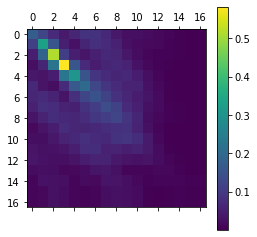

In [13]:
cm0 = utils.utils.parse_json("input/contact_matrices/cm_0.json") # No opening
plt.matshow(cm0)
plt.colorbar()

### 2.2 100% School Re-opening

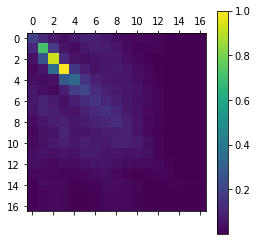

In [14]:
cm100 = utils.utils.parse_json("input/contact_matrices/cm_100.json")
plt.matshow(cm100)
plt.colorbar()

## 3. Simulations

In [17]:
from batchrunner import batchrun

iterations = 20
steps = 300

### 3.1 Vaccination Scenarios under No School Reopening Scenario

In [15]:
fixed_params = utils.utils.parse_json("input/fixed_params.json")
fixed_params["infection_rate"] = infection_rate
fixed_params["death_rate"] = death_rate
fixed_params["recovery_rate"] = recovery_rate

scenarios = {
    "sim0": seirdv_control, 
    "sim1": seirdv_25, 
    "sim2": seirdv_50, 
    "sim3": seirdv_75, 
    "sim4": seirdv_100
}

for sim_id in scenarios:
        print(sim_id)
        batchrun(iterations, steps, sim_id, scenarios[sim_id], fixed_params, cm0, "output/257/NCR/output_0")

sim0
running...
Batch run finished.
sim1
running...
Batch run finished.
sim2
running...
Batch run finished.
sim3
running...
Batch run finished.
sim4
running...
Batch run finished.


### 3.2 Vaccination Scenarios under 100% School Reopening Scenario

In [16]:
for sim_id in scenarios:
        print(sim_id)
        batchrun(iterations, steps, sim_id, scenarios[sim_id], fixed_params, cm100, "output/257/NCR/output_100")

sim0
running...
Batch run finished.
sim1
running...
Batch run finished.
sim2
running...
Batch run finished.
sim3
running...
Batch run finished.
sim4
running...
Batch run finished.


## 4. Analysis

In [18]:
import utils.analysis

total_population = sum(pd.DataFrame(pd.DataFrame(i).sum() for i in seirdv_data).sum()) / len(seirdv_data)
scale = 10000
sim_ids = {
    "sim0": "0% Vaccination",
    "sim1": "25% Vaccination",
    "sim2": "50% Vaccination",
    "sim3": "75% Vaccination",
    "sim4": "100% Vaccination"
}
colors = {
    "sim0": "k", 
    "sim1": "C1", 
    "sim2": "C2", 
    "sim3": "C3", 
    "sim4": "C4"
}
styles = {
    "sim0": ":", 
    "sim1": "-", 
    "sim2": "-", 
    "sim3": "-", 
    "sim4": "-"
}
states = "SEIRDV"

### 4.1 No School Re-opening

#### 4.1.1 Age Dynamics

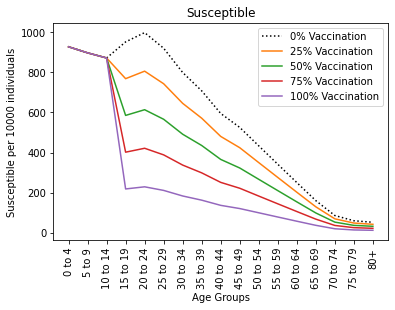

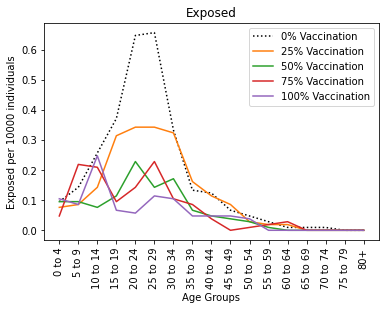

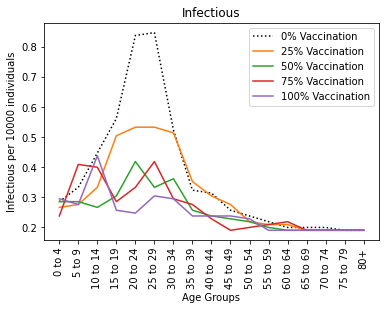

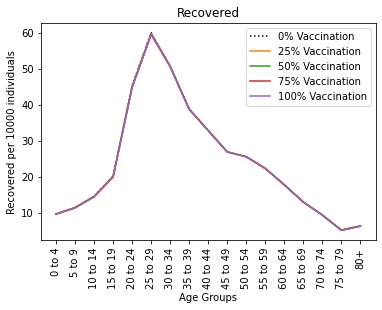

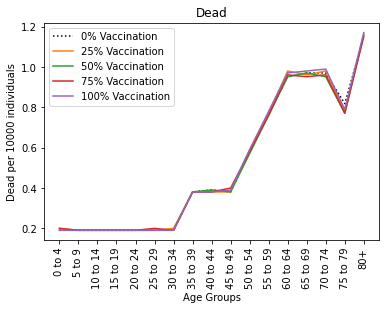

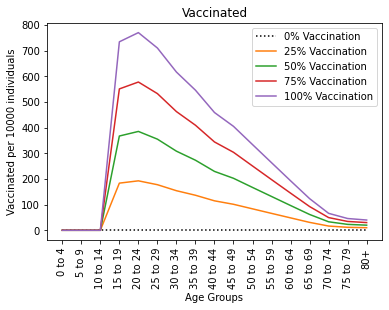

In [19]:
utils.analysis.plot_average_age_dist(
    sim_ids, 
    states, 
    iterations, 
    total_population, 
    scale, colors, 
    styles, 
    "output/257/NCR/output_0"
)

#### 4.1.2 Temporal Dynamics

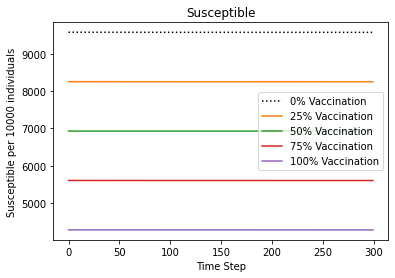

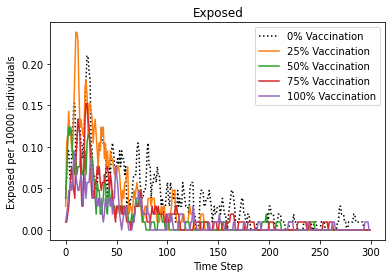

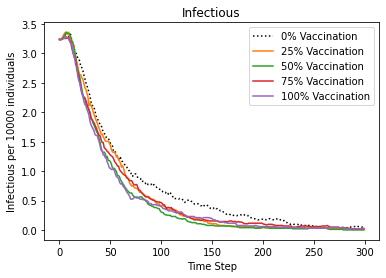

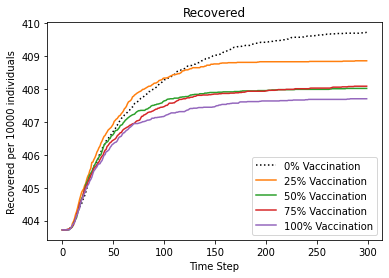

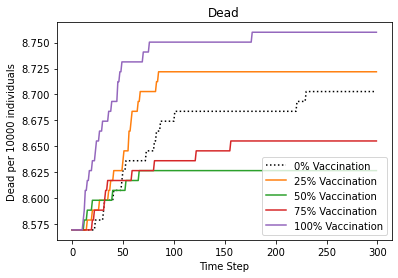

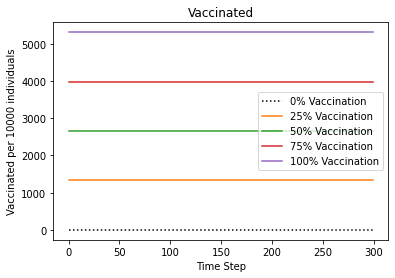

In [20]:
utils.analysis.plot_average_time_series(
    sim_ids, 
    states, 
    steps, 
    iterations, 
    total_population, 
    scale, 
    colors, 
    styles, 
    "output/257/NCR/output_0"
)

### 4.2 100% School Re-opening

#### 4.2.1 Age Dynamics

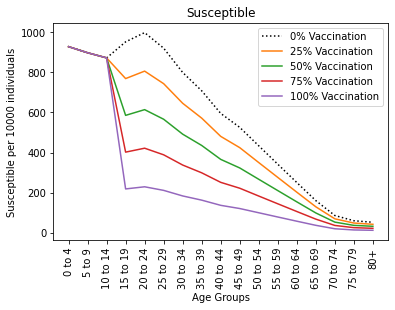

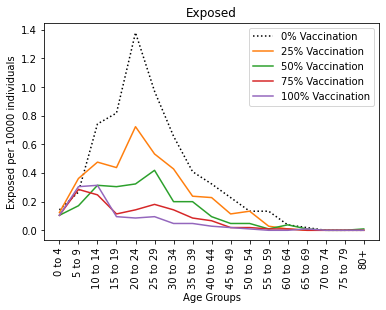

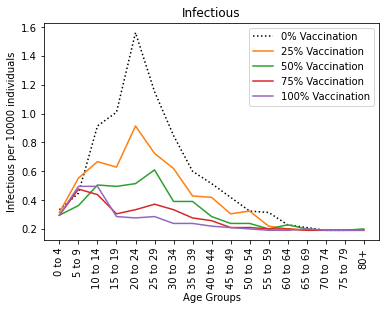

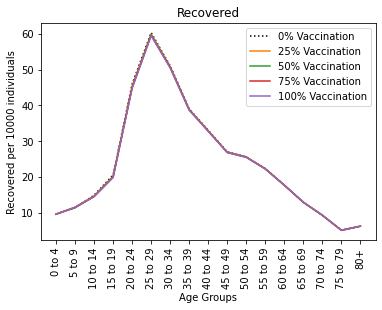

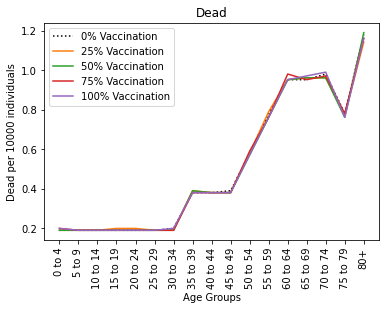

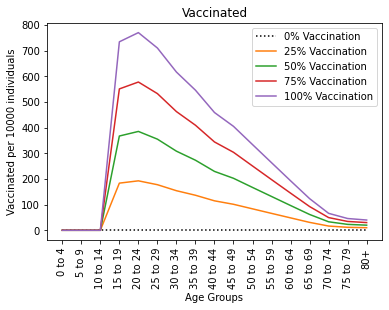

In [21]:
utils.analysis.plot_average_age_dist(
    sim_ids, 
    states, 
    iterations, 
    total_population, 
    scale, colors, 
    styles, 
    "output/257/NCR/output_100"
)

#### 4.2.2 Temporal Dynamics

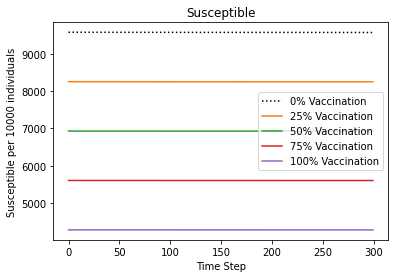

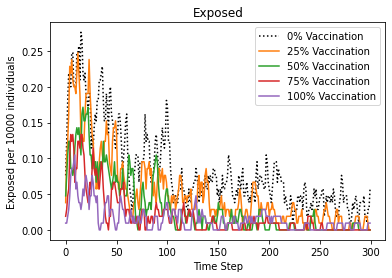

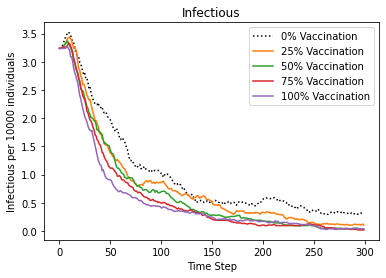

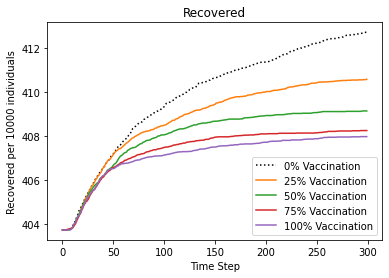

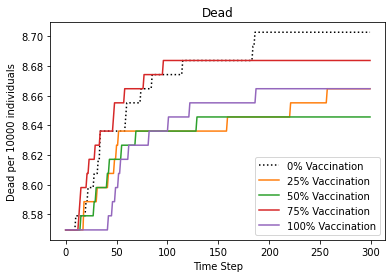

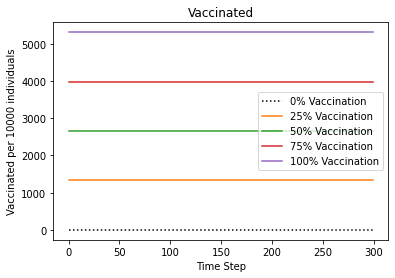

In [22]:
utils.analysis.plot_average_time_series(
    sim_ids, 
    states, 
    steps, 
    iterations, 
    total_population, 
    scale, 
    colors, 
    styles, 
    "output/257/NCR/output_100"
)

### 4.3 Summary

In [23]:
summary_0 = pd.DataFrame([])
summary_100 = pd.DataFrame([])

for sim_id in sim_ids:
    summary_0[sim_id] = pd.DataFrame(
        utils.analysis.get_average_age_dist(
            sim_id, 
            iterations, 
            states, 
            "output/257/NCR/output_0"), 
        index=['S', "E", "I", "R", "D", "V"]).sum(axis=1)
    summary_100[sim_id] = pd.DataFrame(
        utils.analysis.get_average_age_dist(
            sim_id, 
            iterations, 
            states, 
            "output/257/NCR/output_100"), 
        index=['S', "E", "I", "R", "D", "V"]).sum(axis=1)
    
summary_0 = summary_0
summary_100 = summary_100

#### 4.3.1 Summary

In [24]:
summary_0

,sim0,sim1,sim2,sim3,sim4
S,50309.6,43346.20,36387.15,29419.55,22454.95
E,15.4,10.80,5.85,6.45,5.05
I,32.4,27.80,22.85,23.45,22.05
R,2151.5,2146.95,2142.55,2142.90,2140.90
D,45.7,45.80,45.30,45.45,46.00
V,0.0,6974.00,13939.00,20905.00,27870.00


In [25]:
summary_100

,sim0,sim1,sim2,sim3,sim4
S,50292.10,43336.85,36380.95,29418.5,22453.90
E,32.90,20.15,12.05,7.5,6.10
I,49.60,37.15,29.05,24.5,23.05
R,2167.35,2156.10,2148.50,2143.8,2142.35
D,45.70,45.50,45.40,45.6,45.50
V,0.00,6974.00,13939.00,20905.0,27870.00


In [26]:
control_scenario = summary_0 * 0 
control_scenario["sim0"] = summary_0["sim0"]
control_scenario

,sim0,sim1,sim2,sim3,sim4
S,50309.6,0.0,0.0,0.0,0.0
E,15.4,0.0,0.0,0.0,0.0
I,32.4,0.0,0.0,0.0,0.0
R,2151.5,0.0,0.0,0.0,0.0
D,45.7,0.0,0.0,0.0,0.0
V,0.0,0.0,0.0,0.0,0.0


#### 4.3.2 Change in Infections and Deaths

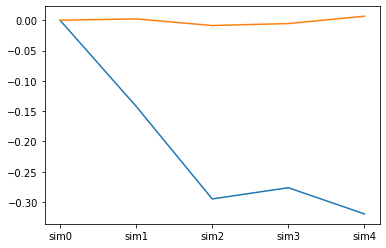

In [27]:
change_0 = ((summary_0.transpose() - summary_0["sim0"]) / summary_0["sim0"]).transpose()
infection_change_0 = change_0.transpose()["I"]
death_change_0 = change_0.transpose()["D"]

plt.plot(infection_change_0)
plt.plot(death_change_0)

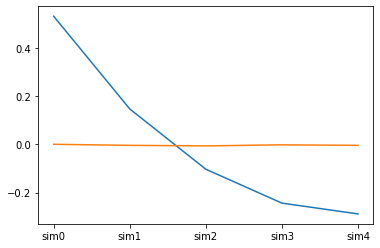

In [28]:
change_100 = ((summary_100.transpose() - summary_0["sim0"]) / summary_0["sim0"]).transpose()
infection_change_100 = change_100.transpose()["I"]
death_change_100 = change_100.transpose()["D"]

plt.plot(infection_change_100)
plt.plot(death_change_100)

In [29]:
infection_change_100

sim0    0.530864
sim1    0.146605
sim2   -0.103395
sim3   -0.243827
sim4   -0.288580
Name: I, dtype: float64

In [30]:
death_change_100

sim0    1.554798e-16
sim1   -4.376368e-03
sim2   -6.564551e-03
sim3   -2.188184e-03
sim4   -4.376368e-03
Name: D, dtype: float64

In [31]:
v = [0, 25, 50, 75, 100]

death_downtick = 0
infection_downtick = 0

for i in range(5):
    if death_change_100[0] < 0 or death_change_100[4] > 0 :
        break
    
    if death_change_100[i] < 0:
        x = [v[i - 1], v[i]]
        y = [death_change_100[i - 1], death_change_100[i]]

        coefficients = np.polyfit(x, y, 1)
        
        death_downtick = abs(coefficients[1] / coefficients[0])
        break

for i in range(5):
    if infection_change_100[0] < 0 or infection_change_100[4] > 0:
        break
    
    if infection_change_100[i] < 0:
        x = [v[i - 1], v[i]]
        y = [infection_change_100[i - 1], infection_change_100[i]]

        coefficients = np.polyfit(x, y, 1)

        infection_downtick = abs(coefficients[1] / coefficients[0])
        break

output = "Death Downtick: {d}%\n Infection Downtick: {i}%".format(d = death_downtick, i = infection_downtick)
output

'Death Downtick: 8.836704669924812e-13%\n Infection Downtick: 39.66049382716049%'

#### 4.3.3 Combined Graphs

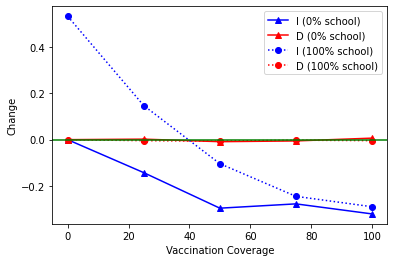

In [32]:
v = [0, 25, 50, 75, 100]

plt.xlabel("Vaccination Coverage")
plt.ylabel("Change")
plt.plot(v, infection_change_0, "b-^")
plt.plot(v, death_change_0, "r-^")
plt.plot(v, infection_change_100, "b:o")
plt.plot(v, death_change_100, "r:o")
plt.axhline(y=0, color='g', linestyle='-')
plt.legend(["I (0% school)", "D (0% school)", "I (100% school)", "D (100% school)"])

#### 4.3.4 Interpolation

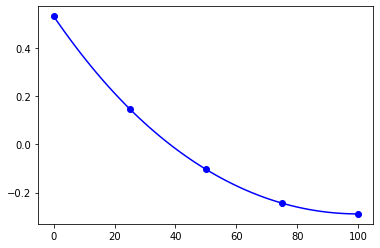

In [35]:
from scipy import interpolate
tck_infection = interpolate.CubicSpline(v, infection_change_100)
xnew = np.arange(0, 100, 1)
plt.plot(v, infection_change_100, 'ob', xnew, tck_infection(xnew),'b')
#tck(70)

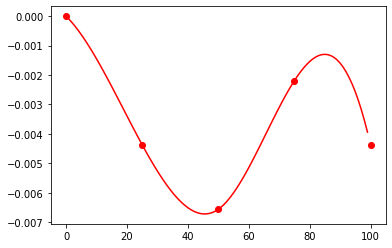

In [36]:
tck_death = interpolate.CubicSpline(v, death_change_100)
xnew = np.arange(0, 100, 1)
plt.plot(v, death_change_100, 'or', xnew, tck_death(xnew),'r')
#tck(70)

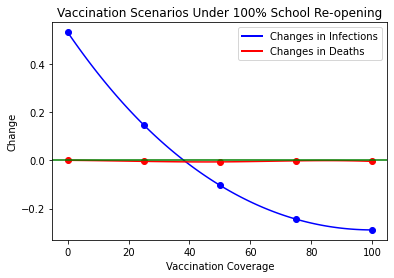

In [38]:
from matplotlib.lines import Line2D
plt.plot(v, infection_change_100, 'ob', xnew, tck_infection(xnew),'b')
plt.plot(v, death_change_100, 'or', xnew, tck_death(xnew),'r')
plt.axhline(y=0, color='g', linestyle='-')
plt.title("Vaccination Scenarios Under 100% School Re-opening")
plt.xlabel("Vaccination Coverage")
plt.ylabel("Change")
legend_elements = [Line2D([0], [0], color='b', lw=2, label='Changes in Infections'), Line2D([0], [0], color='r', lw=2, label='Changes in Deaths')]
plt.legend(handles=legend_elements)